# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import os
os.environ['KERAS_BACKEND'] = 'torch'
import keras
from models.analytical import SingleOccupationSingleIsotope, MultiOccupationMultiIsotope
from training.utils import CPUModel
from evaluation import load_random_search
from evaluation import plot_df as plot
import matplotlib.pyplot as plt
from evaluation import performance_batch_size_plot

Using PyTorch backend.


# Batch size performance

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

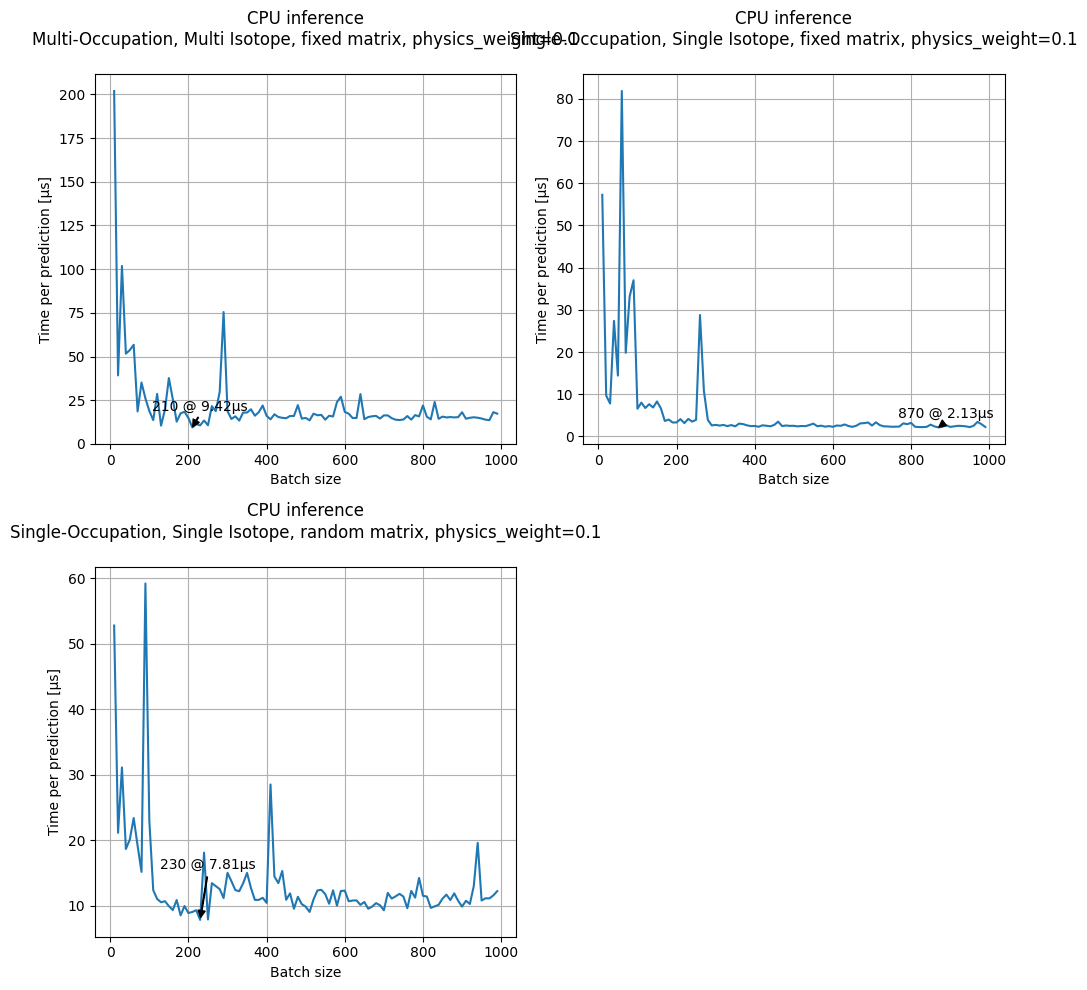

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
momi_physics = keras.models.load_model('trained_models/MOMI_fixed_physics.keras', compile=False)
momi_physics_cpu = CPUModel(momi_physics)
momi_analytical = MultiOccupationMultiIsotope()
performance_batch_size_plot(momi_analytical,momi_physics_cpu)
plt.subplot(2,2,2)
sosi_physics = keras.models.load_model('trained_models/SOSI_fixed_physics.keras', compile=False)
sosi_physics_cpu = CPUModel(sosi_physics)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_cpu)
plt.subplot(2,2,3)
sosi_physics_random = keras.models.load_model('trained_models/SOSI_random_physics.keras', compile=False)
sosi_physics_random_cpu = CPUModel(sosi_physics_random)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_random_cpu)
plt.tight_layout()

# Grid Search Analysis

# SOSI fixed

search space restricted to models taking $<50µs$ to infere

In [3]:
df = load_random_search("random_search/50µs Single-Occupation, Single Isotope, fixed matrix")

  0%|          | 0/501 [00:00<?, ?it/s]

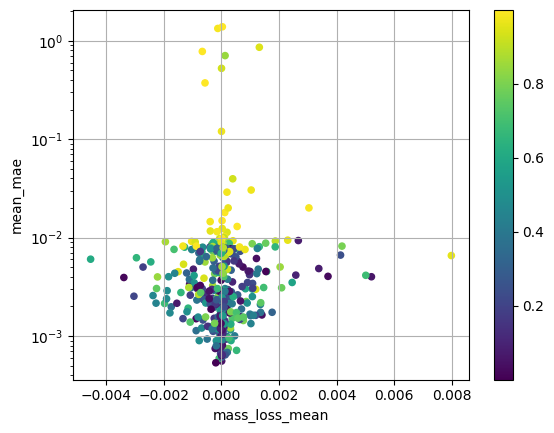

In [8]:
plot(df,"mass_loss_mean","mean_mae","physics_weight",logy=True)

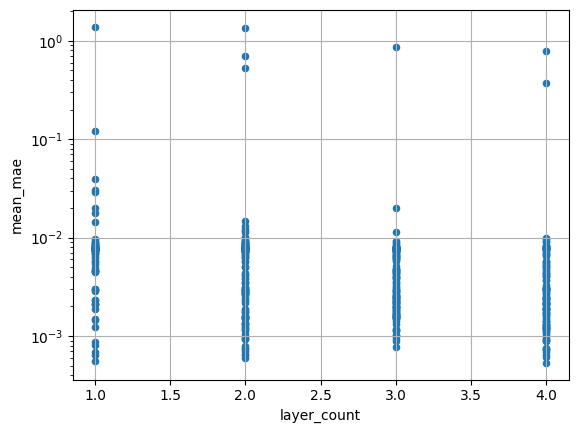

In [9]:
plot(df,
    x="layer_count",
    y="mean_mae",
    logy = True)


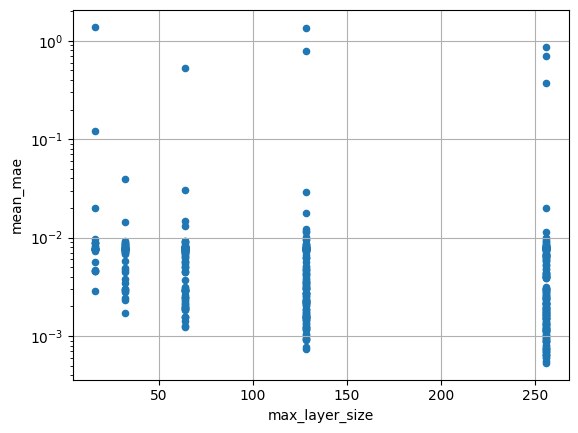

In [11]:
plot(df,
    x="max_layer_size",
    y="mean_mae",
    logy=True,
)

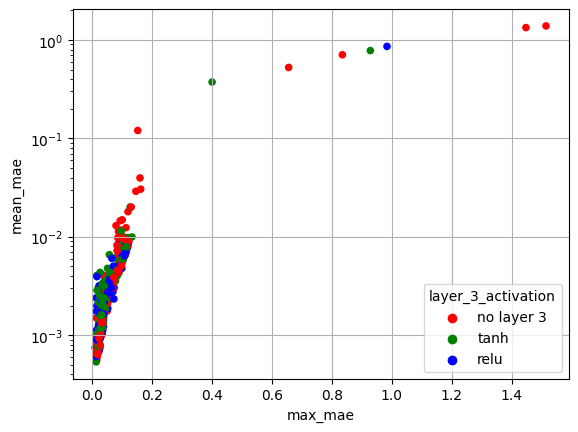

In [12]:
plot(df,
    x="max_mae",
    y="mean_mae",
    c="layer_3_activation",
    logy=True,
)

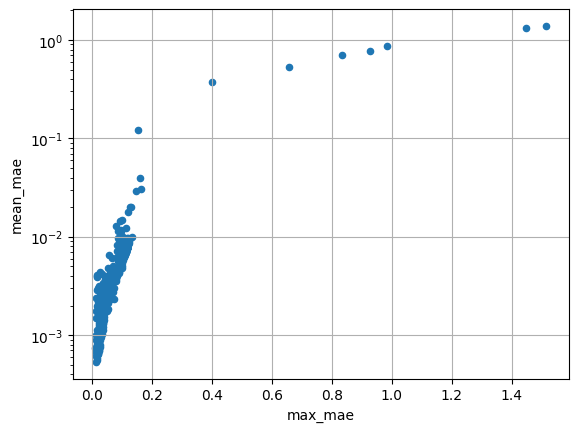

In [15]:
plot(df, "max_mae", "mean_mae", logy=True)

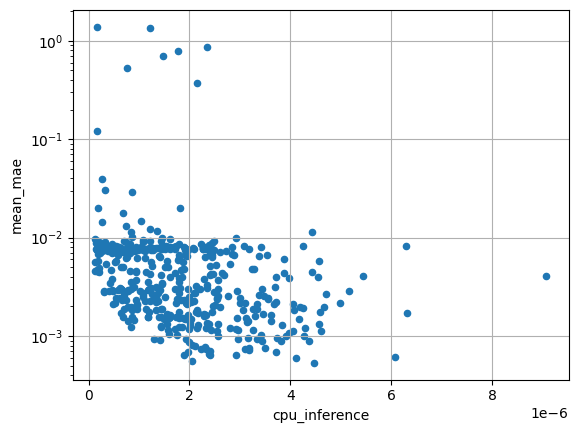

In [31]:
plot(df,"cpu_inference", "mean_mae", logy=True)

In [32]:
df = load_random_search("random_search/50µs Multi-Occupation, Multi Isotope, fixed matrix")

  0%|          | 0/474 [00:00<?, ?it/s]

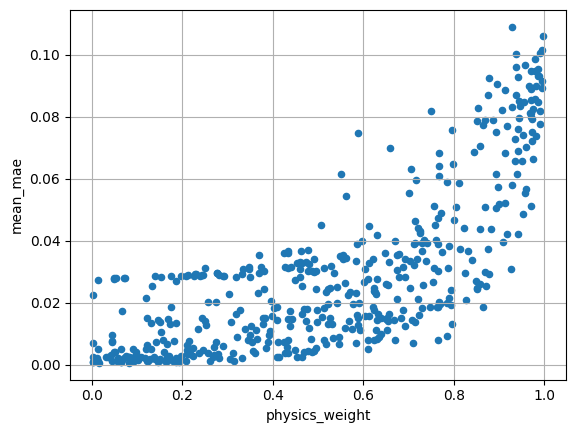

In [35]:
plot(df, "physics_weight", "mean_mae")

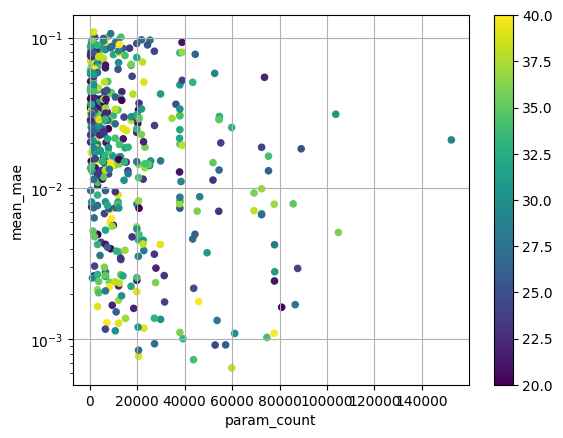

In [40]:
plot(df, "param_count", "mean_mae", "epochs", logy=True)

In [39]:
best_model = df.sort_values("mean_mae").iloc[0]
best_model["mean_mae"], best_model["max_mae"], best_model["mass_loss_mean"], best_model["physics_weight"], best_model["cpu_inference"], best_model["param_count"]

(0.0006474020993788733,
 0.07881494482350085,
 -6.939808794520518e-05,
 0.08173635283167702,
 4.249596688896418e-06,
 59852)